<a href="https://colab.research.google.com/github/NishatVasker/CSE488_Big-Data-Analytics-/blob/main/CSE488_Lab_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
CSE488
Lab Mini Project (Course Advising Dataset)

Group Members:
1. Md. Iftekhar Hossain Khan (2020-3-60-073)
2. Nishat Vasker (2020-2-60-209)
```



# Loading necessary libraries and Preparing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#spark libraries
import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [2]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [3]:
spark

## Mounting Google Drive

In [4]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
%cd /content/drive/MyDrive/CSE488_project/

/content/drive/MyDrive/CSE488_project


In [6]:
!ls

Course_Advising_shuffled_file.xlsx


## Loading the CSV File into Spark Framework

In [11]:
course_list = spark.read.csv("/content/drive/MyDrive/CSE488_project/csv/csv.csv", header=True, inferSchema=True)

In [12]:
course_list.show(truncate=False)

+---------+----------------+-----------+-------------+------+------+------+------+------+----+----+
|StudentId|CreditsCompleted|takencredit|takennocourse|C1    |C2    |C3    |C4    |C5    |C6  |C7  |
+---------+----------------+-----------+-------------+------+------+------+------+------+----+----+
|1        |29.5            |14.5       |4            |CSE110|ECO101|MAT205|PHY109|NULL  |NULL|NULL|
|2        |41.0            |14.0       |4            |CSE207|CSE209|MAT205|PHY209|NULL  |NULL|NULL|
|3        |17.5            |17.5       |5            |CSE110|ENG102|MAT102|MAT104|PHY109|NULL|NULL|
|4        |44.5            |13.5       |4            |CSE110|GEN203|MAT101|MAT205|NULL  |NULL|NULL|
|5        |82.0            |4.0        |1            |CSE303|NULL  |NULL  |NULL  |NULL  |NULL|NULL|
|6        |0.0             |14.5       |4            |CHE109|CSE103|CSE106|ENG101|NULL  |NULL|NULL|
|7        |27.5            |17.5       |5            |CSE110|ECO101|MAT104|STA102|CSE209|NULL|NULL|


## No. of entries in the CSV

In [13]:
rows = course_list.count()
columns = len(course_list.columns)
shape = f'{rows}, {columns}'
print(f'Course List Shape: ({shape})')

Course List Shape: (2960, 11)


## Combining the C1 to C7 courses into Course Array for Handling Nulls

In [14]:
# Combine C1 to C7 into a Course Array (Handling Nulls)
df = course_list.withColumn("Courses", array(col("C1"), col("C2"), col("C3"), col("C4"), col("C5"), col("C6"), col("C7"))).drop("C1", "C2", "C3", "C4", "C5", "C6", "C7")

In [15]:
# Remove Nulls from Courses Array
remove_null_expression = "filter(Courses, x -> x is not null)"

df = df.withColumn("Courses", expr(remove_null_expression))
df.show(truncate=False)

+---------+----------------+-----------+-------------+----------------------------------------+
|StudentId|CreditsCompleted|takencredit|takennocourse|Courses                                 |
+---------+----------------+-----------+-------------+----------------------------------------+
|1        |29.5            |14.5       |4            |[CSE110, ECO101, MAT205, PHY109]        |
|2        |41.0            |14.0       |4            |[CSE207, CSE209, MAT205, PHY209]        |
|3        |17.5            |17.5       |5            |[CSE110, ENG102, MAT102, MAT104, PHY109]|
|4        |44.5            |13.5       |4            |[CSE110, GEN203, MAT101, MAT205]        |
|5        |82.0            |4.0        |1            |[CSE303]                                |
|6        |0.0             |14.5       |4            |[CHE109, CSE103, CSE106, ENG101]        |
|7        |27.5            |17.5       |5            |[CSE110, ECO101, MAT104, STA102, CSE209]|
|8        |86.0            |16.0       |

# (1) Frequency Analysis

## Finding the frequency of individual courses from C1 to C7

In [16]:
# Explode Courses for Frequency Analysis
exploded = df.select("StudentId", explode(col("Courses")).alias("Course"))

In [17]:
# Count Single Course Frequencies and sort
single_counts = exploded.groupBy("Course").count().orderBy("count", ascending=False).filter("count >= 4")
single_counts.show(54)

+------+-----+
|Course|count|
+------+-----+
|CSE106|  913|
|CSE103|  800|
|ENG101|  709|
|CSE110|  538|
|MAT101|  532|
|STA102|  436|
|CHE109|  423|
|PHY109|  422|
|CSE209|  422|
|CSE207|  398|
|CSE200|  395|
|MAT104|  373|
|CSE246|  357|
|MAT205|  355|
|PHY209|  352|
|ECO101|  350|
|CSE302|  279|
|MAT102|  274|
|CSE345|  258|
|GEN226|  255|
|CSE325|  254|
|CSE303|  235|
|CSE251|  226|
|CSE400|  212|
|ENG102|  211|
|CSE347|  203|
|CSE360|  199|
|CSE366|  199|
|CSE405|  169|
|CSE487|  149|
|FIN101|  133|
|CSE495|  113|
|CSE407|  104|
|CSE438|  101|
|CSE412|  100|
|CSE479|   99|
|GEN203|   98|
|CSE475|   94|
|GEN214|   77|
|CSE350|   69|
|CSE489|   57|
|CSE477|   52|
|GEN210|   52|
|MKT101|   45|
|CSE430|   43|
|CSE464|   36|
|ENG099|   35|
|CSE420|   35|
|CSE488|   33|
|ACT101|   31|
|BUS231|   20|
|MGT337|    8|
|BUS101|    4|
+------+-----+



## Identify the most and least popular courses.

In [19]:
# show the results of most and least popular from single_count
most_popular = single_counts.first()
least_popular = single_counts.orderBy("count", ascending=True).first()

print(f'Most Popular Course: {most_popular["Course"]} (Count: {most_popular["count"]})')
print(f'Least Popular Course: {least_popular["Course"]} (Count: {least_popular["count"]})')


Most Popular Course: CSE106 (Count: 913)
Least Popular Course: BUS101 (Count: 4)


# (2) Pattern Analysis

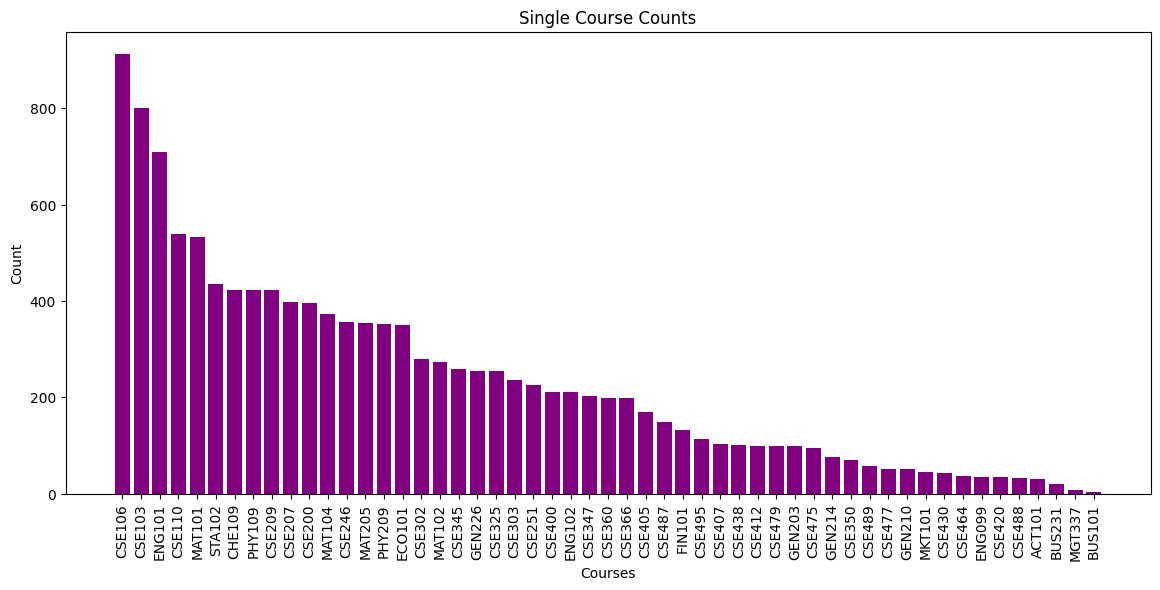

In [20]:
# Convert the Spark DataFrame to Pandas DataFrame
single_counts_pd = single_counts.toPandas()

# Plot the bar chart
plt.figure(figsize=(14,6))
plt.bar(single_counts_pd['Course'], single_counts_pd['count'], color='purple')
plt.xlabel('Courses')
plt.ylabel('Count')
plt.title('Single Course Counts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Identify the most frequent combinations of courses taken together (pairs)

In [21]:
# Collect Frequent Courses
frequent_courses = single_counts.select("Course").rdd.flatMap(lambda x: x).collect()

In [22]:
# Filter Transactions by Frequent Courses
filtered = df.withColumn("filtered_courses", col("Courses")).select("StudentId", explode(col("Courses")).alias("Course")).filter(col("Course").isin(frequent_courses))

In [23]:
# Generate Candidate Pairs
candidate_pairs = filtered.alias("a").join(filtered.alias("b"),
                                           (col("a.StudentId") == col("b.StudentId")) &
                                           (col("a.Course") < col("b.Course"))
                                           ).selectExpr("a.Course as Course1", "b.Course as Course2")

In [24]:
# Count Frequent Pairs
frequent_pairs = candidate_pairs.groupBy("Course1", "Course2").count().filter("count >= 2").orderBy("count", ascending=False)
frequent_pairs.show()

+-------+-------+-----+
|Course1|Course2|count|
+-------+-------+-----+
| CSE103| CSE106|  756|
| CSE103| ENG101|  696|
| CSE106| ENG101|  693|
| CSE106| MAT101|  509|
| CSE103| MAT101|  508|
| ENG101| MAT101|  460|
| CHE109| CSE106|  307|
| CHE109| CSE103|  283|
| CSE110| STA102|  243|
| CHE109| ENG101|  238|
| CSE110| PHY109|  233|
| CSE207| CSE209|  193|
| CSE110| MAT104|  187|
| CSE110| ECO101|  161|
| MAT104| STA102|  160|
| PHY109| STA102|  160|
| CSE209| MAT205|  159|
| CSE207| MAT205|  153|
| CSE246| CSE325|  153|
| CSE110| MAT102|  151|
+-------+-------+-----+
only showing top 20 rows



## Identify the most frequent combinations of courses taken together (triples)

In [25]:
# Generate Triples
candidate_triples = frequent_pairs.alias("p").join(filtered.alias("c"),
                                                   (col("p.Course1") == col("c.Course")) |
                                                   (col("p.Course2") == col("c.Course"))
                                                   ).filter(col("p.Course1") != col("c.Course")) \
                                                 .filter(col("p.Course2") != col("c.Course")) \
                                                 .selectExpr("p.Course1", "p.Course2", "c.Course as Course3")

In [26]:
# Count Frequent Triples
triplet_candidates = frequent_pairs.alias("a").join(
    frequent_pairs.alias("b"),
    col("a.Course2") == col("b.Course1")  # Match pairs that share a course
).select(
    col("a.Course1").alias("Course1"),
    col("a.Course2").alias("Course2"),
    col("b.Course2").alias("Course3")
).filter(
    col("Course1") < col("Course2")  # Ensure lexicographic order
).filter(
    col("Course2") < col("Course3")
)

In [27]:
frequent_triples = triplet_candidates.groupBy("Course1", "Course2", "Course3").count().filter("count >= 1").orderBy("count", ascending=False)
frequent_triples.show()

+-------+-------+-------+-----+
|Course1|Course2|Course3|count|
+-------+-------+-------+-----+
| CSE103| CSE106| CSE347|    1|
| CSE103| CSE106| CSE438|    1|
| CSE103| CSE106| CSE407|    1|
| CSE103| CSE106| MAT104|    1|
| CSE103| CSE106| MAT101|    1|
| CSE103| CSE106| CSE412|    1|
| CSE103| CSE106| CSE200|    1|
| CSE103| CSE106| MAT205|    1|
| CSE103| CSE106| CSE209|    1|
| CSE103| CSE106| CSE475|    1|
| CSE103| CSE106| GEN226|    1|
| CSE103| CSE106| CSE110|    1|
| CSE103| CSE106| ENG102|    1|
| CSE103| CSE106| PHY209|    1|
| CSE103| CSE106| STA102|    1|
| CSE103| CSE106| CSE489|    1|
| CSE103| CSE106| MKT101|    1|
| CSE103| CSE106| GEN203|    1|
| CSE103| CSE106| ECO101|    1|
| CSE103| CSE106| CSE495|    1|
+-------+-------+-------+-----+
only showing top 20 rows



# (3) Statistical Measure

In [28]:
# Convert the Spark DataFrame to a Pandas DataFrame for easier calculations
pandas_df = df.toPandas()

# Calculate mean, median, and mode for numerical columns
numerical_cols = ['CreditsCompleted', 'takencredit', 'takennocourse']

for col in numerical_cols:
  if col in pandas_df.columns:
    mean_val = np.mean(pandas_df[col])
    median_val = np.median(pandas_df[col])
    mode_val = pandas_df[col].mode()[0]  # Get the first mode if multiple exist

    print(f"Statistics for column '{col}':")
    print(f"  Mean: {mean_val}")
    print(f"  Median: {median_val}")
    print(f"  Mode: {mode_val}")
  else:
      print(f"Column '{col}' not found in the DataFrame.")

Statistics for column 'CreditsCompleted':
  Mean: 42.559797297297294
  Median: 33.5
  Mode: 0.0
Statistics for column 'takencredit':
  Mean: 14.46875
  Median: 14.5
  Mode: 14.5
Statistics for column 'takennocourse':
  Mean: 4.171621621621622
  Median: 4.0
  Mode: 4


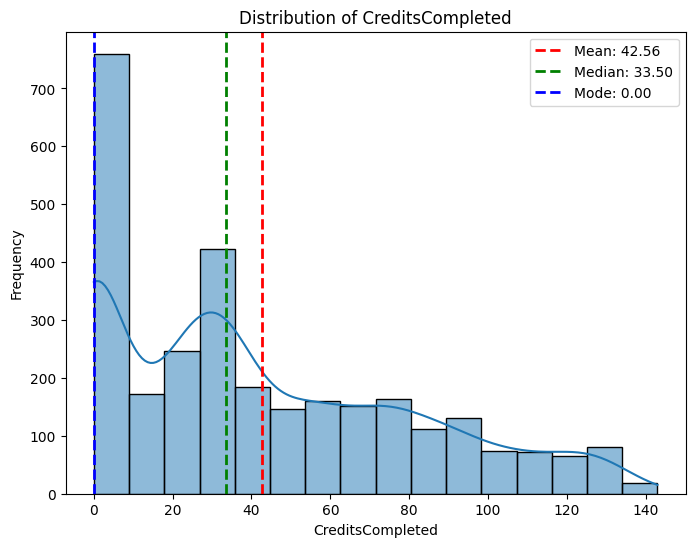

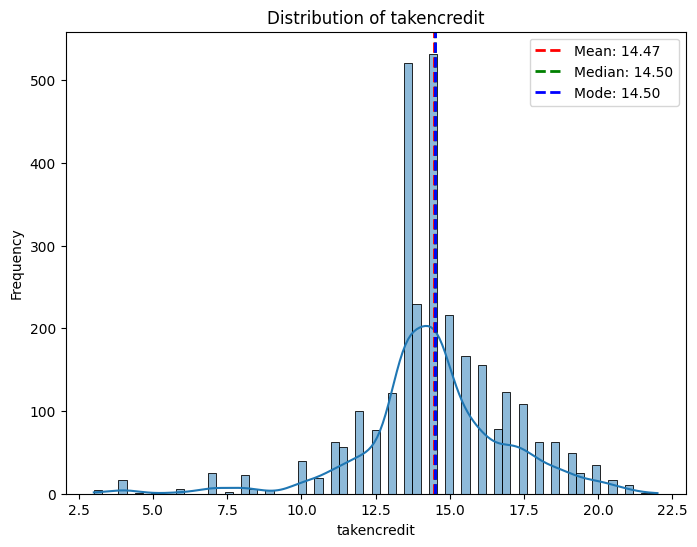

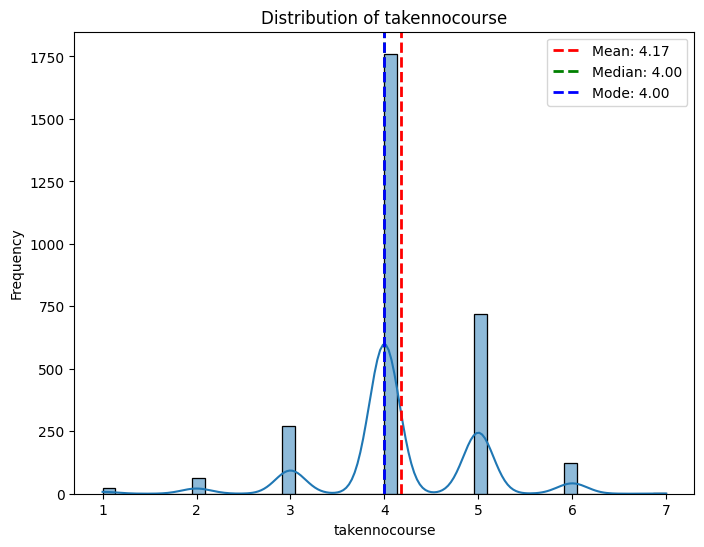

In [30]:
# CreditsCompleted, takencredit, and takennocourse.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pandas_df' is your Pandas DataFrame
numerical_cols = ['CreditsCompleted', 'takencredit', 'takennocourse']

for col in numerical_cols:
    if col in pandas_df.columns:
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed

        # Calculate mean, median, and mode
        mean_val = np.mean(pandas_df[col])
        median_val = np.median(pandas_df[col])
        mode_val = pandas_df[col].mode()[0]

        # Create a distribution plot
        sns.histplot(pandas_df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Add mean, median, and mode lines to the plot
        plt.axvline(mean_val, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
        plt.axvline(mode_val, color='b', linestyle='dashed', linewidth=2, label=f'Mode: {mode_val:.2f}')

        plt.legend()
        plt.show()

    else:
        print(f"Column '{col}' not found in the DataFrame.")

Correlation Matrix:
                  CreditsCompleted  takencredit  takennocourse
CreditsCompleted          1.000000     0.005571      -0.102241
takencredit               0.005571     1.000000       0.871445
takennocourse            -0.102241     0.871445       1.000000


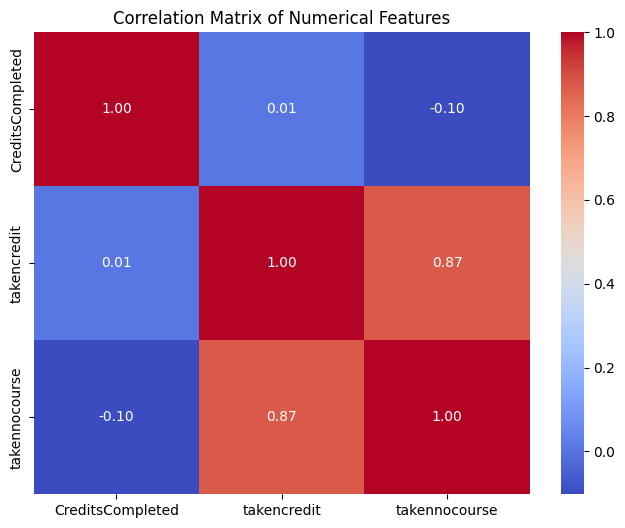

In [34]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = pandas_df[numerical_cols].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Visualization Tasks

# (4) Course Popularity

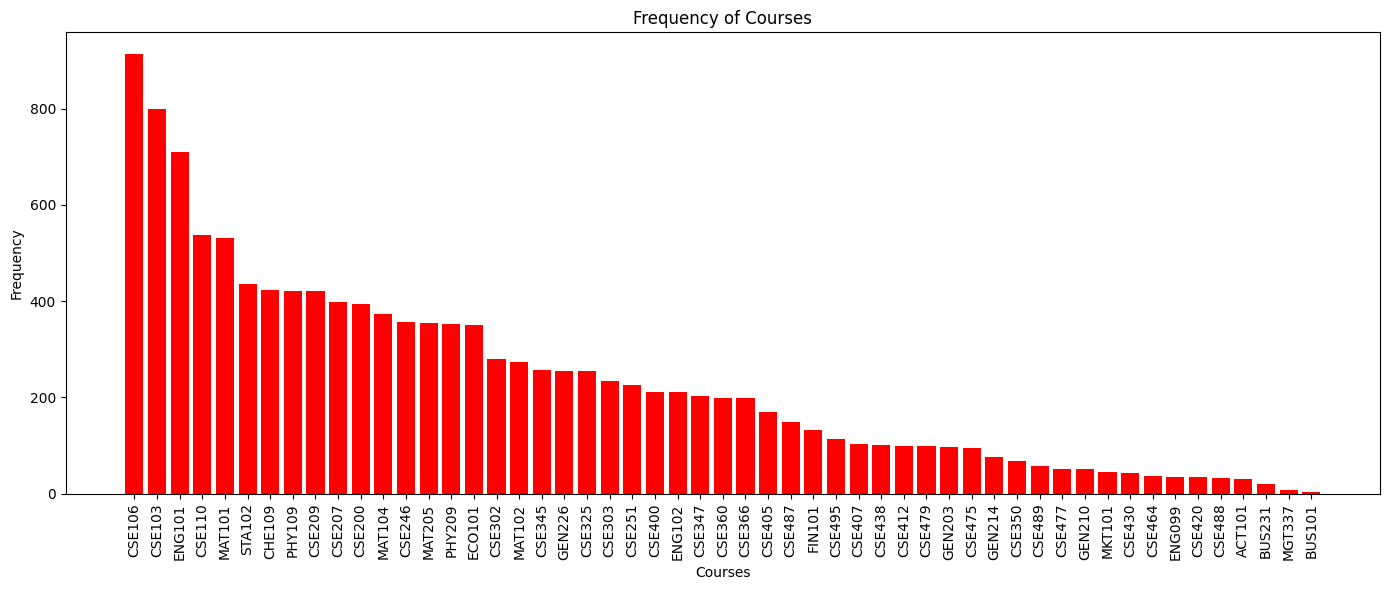

In [39]:
# frequency analysis

import matplotlib.pyplot as plt

# Assuming 'single_counts_pd' is your Pandas DataFrame from the previous code
# single_counts_pd = single_counts.toPandas()

plt.figure(figsize=(14, 6))
plt.bar(single_counts_pd['Course'], single_counts_pd['count'], color='red')
plt.xlabel('Courses')
plt.ylabel('Frequency')
plt.title('Frequency of Courses')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

#(5) Combination Patterns:

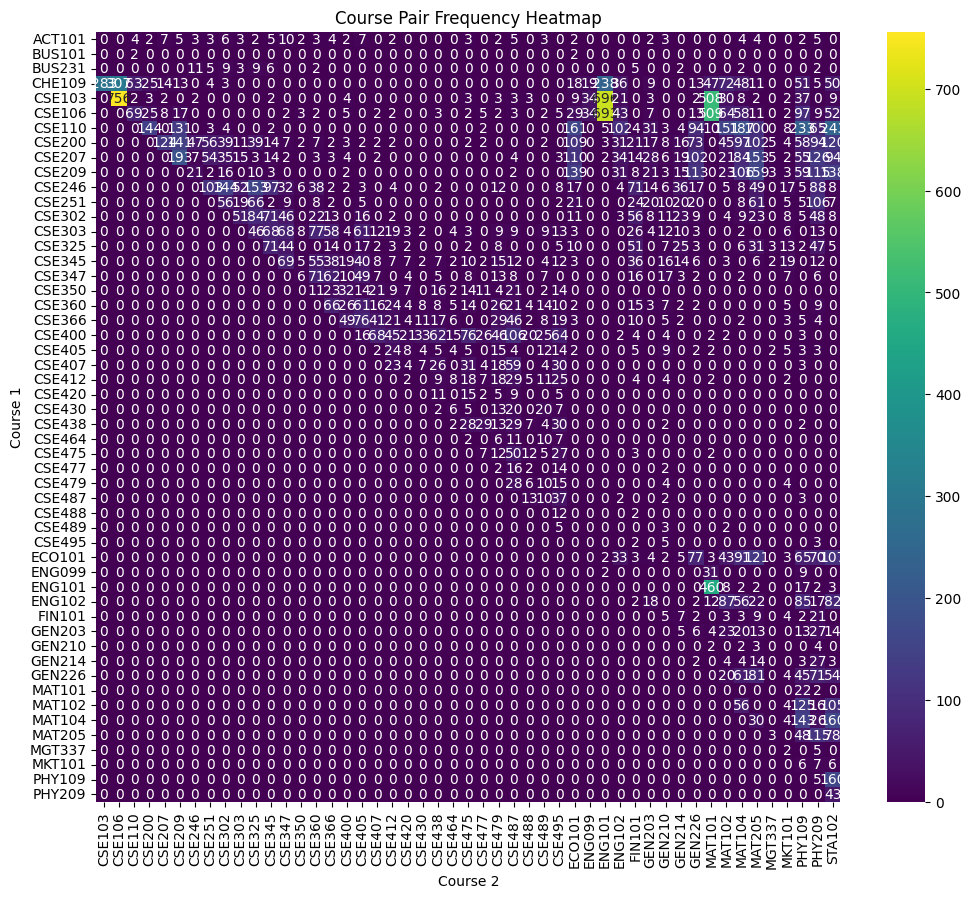

In [43]:
# frequently taken together.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming frequent_pairs is your Spark DataFrame of course pairs
frequent_pairs_pd = frequent_pairs.toPandas()

# Create a pivot table for the heatmap
course_matrix = frequent_pairs_pd.pivot(index='Course1', columns='Course2', values='count').fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(course_matrix, annot=True, cmap='viridis', fmt=".0f")
plt.title('Course Pair Frequency Heatmap')
plt.xlabel('Course 2')
plt.ylabel('Course 1')
plt.show()

#(6) Credits Distribution:

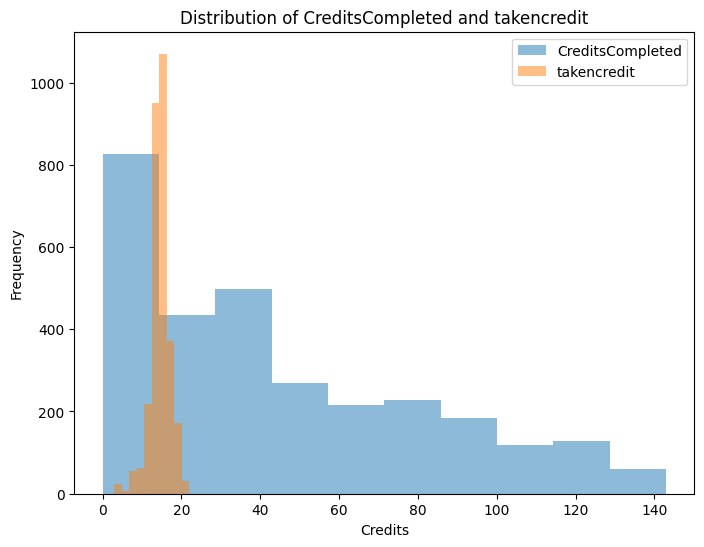

In [44]:
# Assuming 'pandas_df' is your Pandas DataFrame from the previous code
plt.figure(figsize=(8, 6))
plt.hist(pandas_df['CreditsCompleted'], bins=10, alpha=0.5, label='CreditsCompleted')
plt.hist(pandas_df['takencredit'], bins=10, alpha=0.5, label='takencredit')
plt.xlabel('Credits')
plt.ylabel('Frequency')
plt.title('Distribution of CreditsCompleted and takencredit')
plt.legend(loc='upper right')
plt.show()

# (7) Course Co-occurrence:

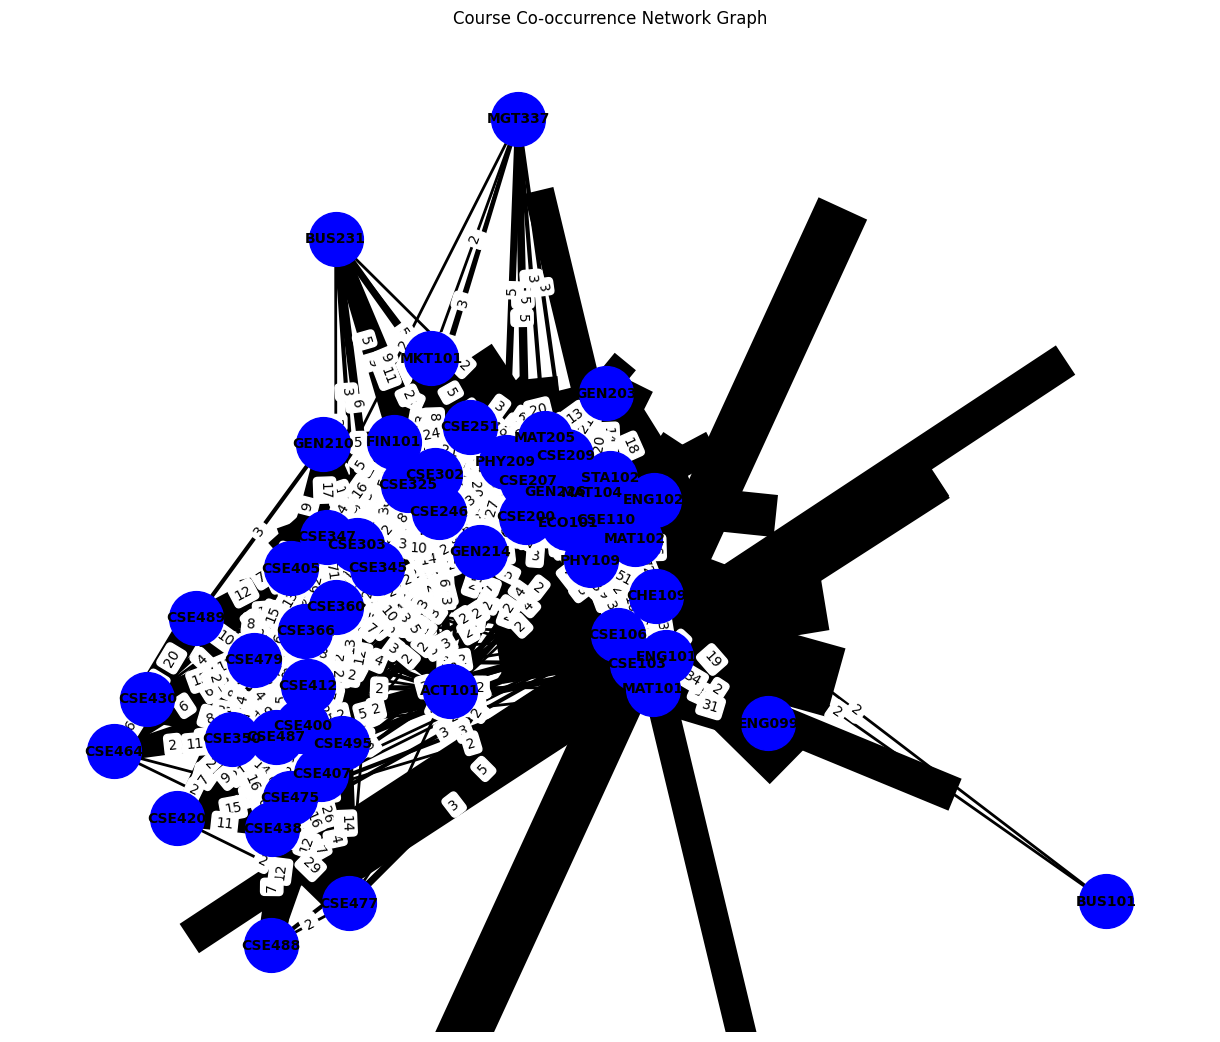

In [50]:
import networkx as nx

# Assuming frequent_pairs is your Spark DataFrame
frequent_pairs_pd = frequent_pairs.toPandas()

# Create a graph
graph = nx.Graph()

# Add edges with weights based on frequency
for index, row in frequent_pairs_pd.iterrows():
    graph.add_edge(row['Course1'], row['Course2'], weight=row['count'])

# Draw the network graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(graph, k=0.3) # Adjust k for node spacing
nx.draw(graph, pos, with_labels=True, node_size=1500, node_color="blue", font_size=10, font_weight="bold", width=list(nx.get_edge_attributes(graph, 'weight').values()))
# Add edge labels (weights)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.title("Course Co-occurrence Network Graph")
plt.show()

# **Predictive Analytics**

# 8. Association Rule Mining:

In [52]:
from pyspark.ml.fpm import FPGrowth

# Assuming 'df' is your Spark DataFrame with the 'Courses' column
# (Ensure 'Courses' column contains arrays of courses)

# Convert the 'Courses' column to a list of strings
df = df.withColumn("Courses", df["Courses"].cast("array<string>"))

# Train the FP-Growth model
fpGrowth = FPGrowth(itemsCol="Courses", minSupport=0.01, minConfidence=0.1) # Adjust minSupport and minConfidence
model = fpGrowth.fit(df)

# Display frequent itemsets
model.freqItemsets.show(truncate=False)


# Display generated association rules
association_rules = model.associationRules
association_rules.show(truncate=False)

# Transform the dataset to predict frequent itemsets
transformed_df = model.transform(df)
transformed_df.show(truncate=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


+--------------------------------+----+
|items                           |freq|
+--------------------------------+----+
|[CSE400]                        |212 |
|[CSE407]                        |104 |
|[CSE407, CSE400]                |68  |
|[CSE407, CSE487]                |59  |
|[CSE407, CSE487, CSE400]        |42  |
|[CSE407, CSE495]                |30  |
|[CSE407, CSE366]                |41  |
|[GEN210]                        |52  |
|[CSE430]                        |43  |
|[CSE430, CSE400]                |33  |
|[CSE479]                        |99  |
|[CSE479, CSE400]                |46  |
|[MAT102]                        |274 |
|[MAT102, MAT104]                |56  |
|[MAT102, MAT104, CSE110]        |32  |
|[MAT102, STA102]                |105 |
|[MAT102, STA102, CSE110]        |67  |
|[MAT102, PHY109]                |125 |
|[MAT102, PHY109, STA102]        |51  |
|[MAT102, PHY109, STA102, CSE110]|34  |
+--------------------------------+----+
only showing top 20 rows

+-------------

# 9. Clustering:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


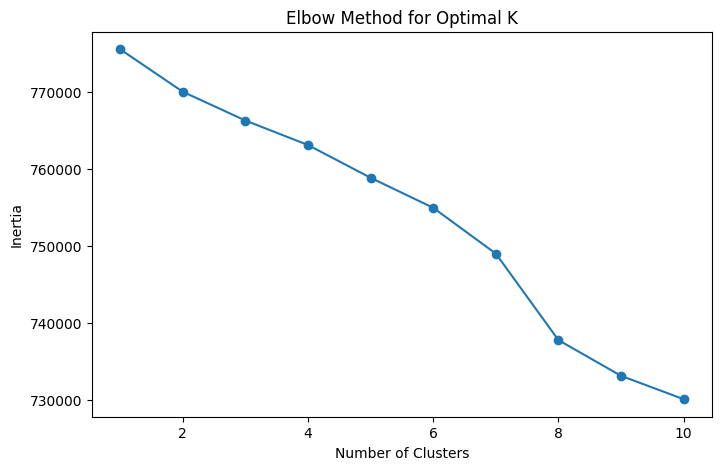

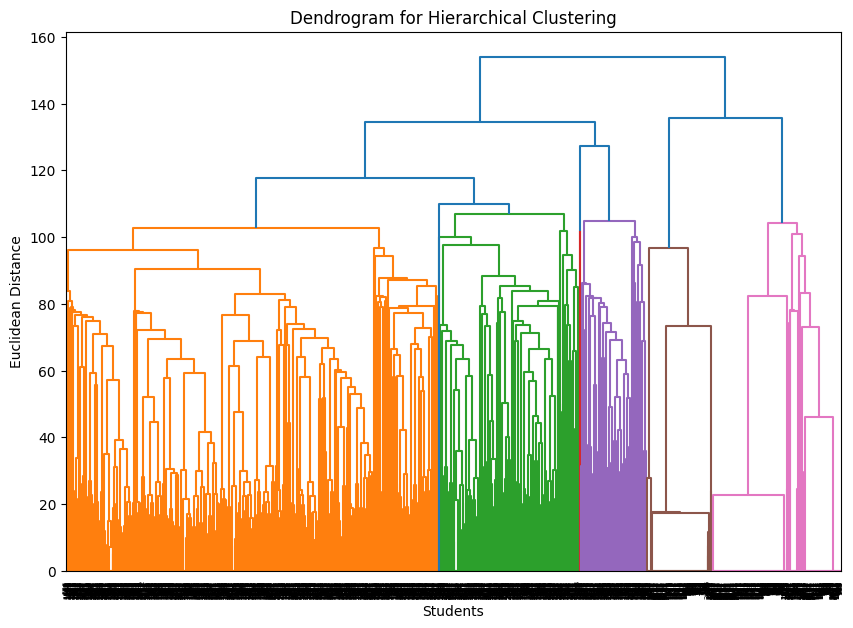

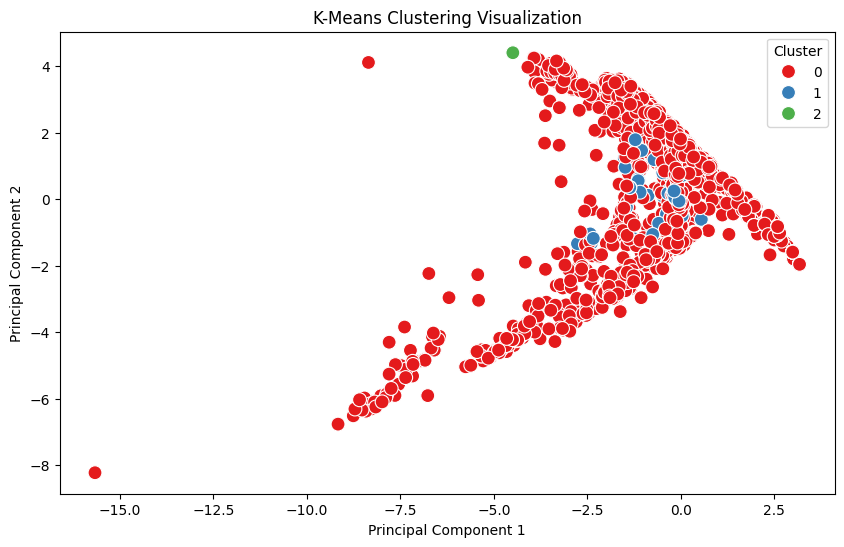

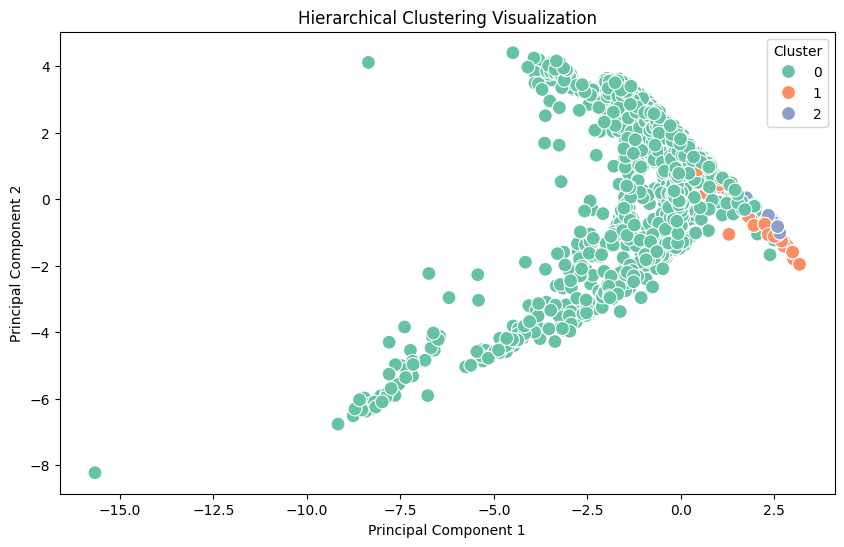

Clustering completed and saved to clustered_students.csv


In [64]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load the Dataset (Ensure your dataset is loaded in 'data')
data = pd.read_csv("/content/drive/MyDrive/CSE488_project/csv/csv.csv")

# Step 2: Preprocess the Data
# Assuming columns C1 to C7 represent courses taken by students
courses = data[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']]

# Fill missing values and encode courses using One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Replace 'sparse' with 'sparse_output'
courses_encoded = encoder.fit_transform(courses.fillna('None'))

# Scale the data
scaler = StandardScaler()
courses_scaled = scaler.fit_transform(courses_encoded)

# Step 3: K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(courses_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with chosen number of clusters (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(courses_scaled)
data['KMeans_Cluster'] = kmeans_labels

# Step 4: Hierarchical Clustering
# Perform hierarchical clustering
linkage_matrix = linkage(courses_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Students')
plt.ylabel('Euclidean Distance')
plt.show()


# Apply Agglomerative Clustering with a chosen number of clusters (e.g., 3)
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(courses_scaled)
data['Hierarchical_Cluster'] = hierarchical_labels

# Step 5: Visualize Clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(courses_scaled)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# K-Means Cluster Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=data, palette='Set1', s=100)
plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Hierarchical Cluster Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=data, palette='Set2', s=100)
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 6: Save Results
data.to_csv("clustered_students.csv", index=False)
print("Clustering completed and saved to clustered_students.csv")


# **Advanced Analytics**

# 10. Recommendation System:

In [73]:
pip install mlxtend seaborn matplotlib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Available courses:  ['ACT101', 'BUS101', 'BUS231', 'CE200-', 'CHE109', 'CSE103', 'CSE106', 'CSE110', 'CSE200', 'CSE207', 'CSE209', 'CSE246', 'CSE251', 'CSE302', 'CSE303', 'CSE325', 'CSE345', 'CSE347', 'CSE350', 'CSE360', 'CSE366', 'CSE400', 'CSE405', 'CSE407', 'CSE412', 'CSE420', 'CSE430', 'CSE438', 'CSE453', 'CSE464', 'CSE475', 'CSE477', 'CSE479', 'CSE487', 'CSE488', 'CSE489', 'CSE495', 'ECO101', 'ECO102', 'ENG099', 'ENG101', 'ENG102', 'FIN101', 'GEN202', 'GEN203', 'GEN205', 'GEN209', 'GEN210', 'GEN214', 'GEN226', 'MAT101', 'MAT102', 'MAT104', 'MAT110', 'MAT205', 'MGT337', 'MKT101', 'PHY109', 'PHY209', 'STA102']
Enter the courses you have taken (comma-separated): CSE110,CSE200,CSE103,CSE106

Recommended Courses:  MAT101, None, ENG101


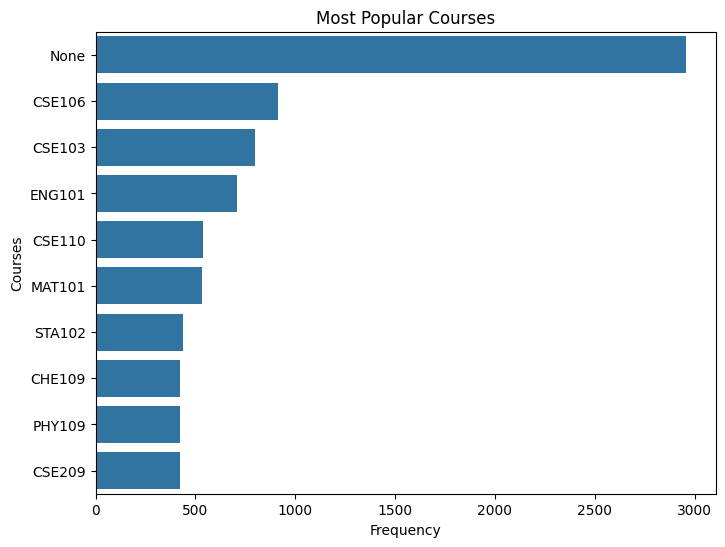

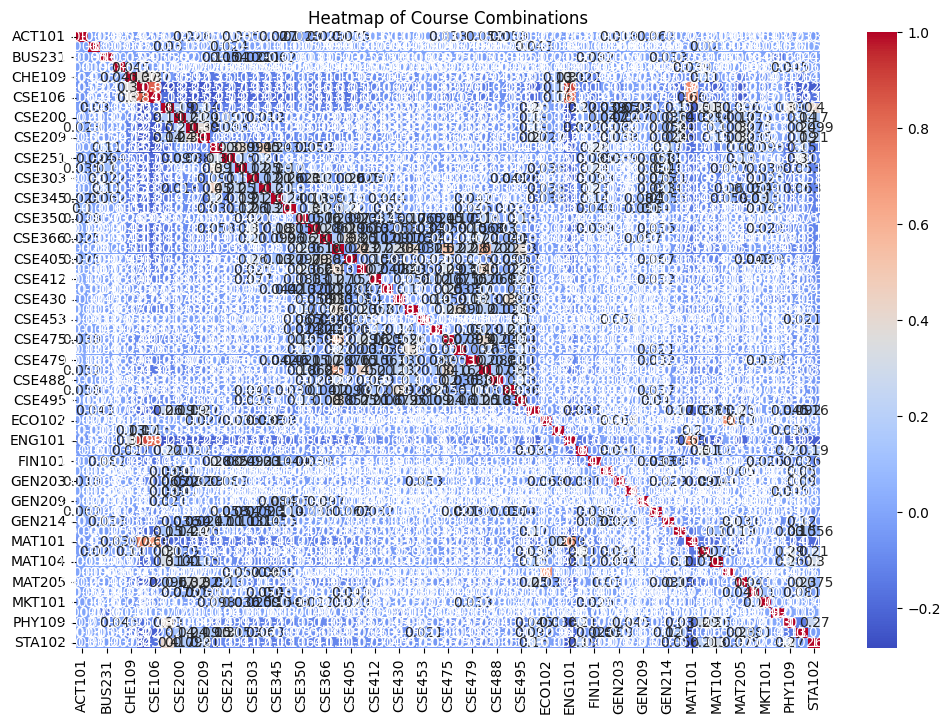

In [75]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load Data
data = pd.read_csv("/content/drive/MyDrive/CSE488_project/csv/csv.csv")  # Replace with your file path

# Step 2: Preprocess Data
# Assuming columns C1 to C7 represent courses taken by students
courses = data[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].fillna('None')

# Convert courses into a one-hot encoded format
def encode_courses(df):
    encoded = pd.get_dummies(df, prefix='', prefix_sep='', dummy_na=False)
    return encoded.T.groupby(level=0).sum().T.clip(upper=1)

encoded_courses = encode_courses(courses)
encoded_courses = encoded_courses.astype(bool)  # Ensure binary format for apriori

# Step 3: Generate Association Rules
frequent_itemsets = apriori(encoded_courses, min_support=0.1, use_colnames=True)

# Handle compatibility for `association_rules`
try:
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
except TypeError:
    rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets), metric='confidence', min_threshold=0.5)

# Step 4: Create Recommendation Function
def recommend_courses(taken_courses):
    recommendations = []
    for course in taken_courses:
        filtered_rules = rules[rules['antecedents'].apply(lambda x: course in x)]
        for _, rule in filtered_rules.iterrows():
            recommendations.extend(list(rule['consequents']))
    return list(set(recommendations) - set(taken_courses))

# Step 5: Interactive Recommendation
print("Available courses: ", sorted(set(courses.values.flatten()) - {'None'}))
taken_courses = input("Enter the courses you have taken (comma-separated): ").split(",")
taken_courses = [course.strip() for course in taken_courses]

recommended_courses = recommend_courses(taken_courses)
if recommended_courses:
    print("\nRecommended Courses: ", ", ".join(recommended_courses))
else:
    print("\nNo recommendations available for the selected courses.")

# Step 6: Visualization
# Popular Courses
popular_courses = encoded_courses.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=popular_courses.values, y=popular_courses.index)
plt.title("Most Popular Courses")
plt.xlabel("Frequency")
plt.ylabel("Courses")
plt.show()

# Heatmap of Course Combinations
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_courses.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap of Course Combinations")
plt.show()


In [80]:
pip install jupyter-dash dash pandas plotly mlxtend pyngrok


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [1]:
!pip install gradio pandas mlxtend plotly

import gradio as gr
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import plotly.express as px

# Step 1: Load Data
data = pd.read_csv("/content/drive/MyDrive/CSE488_project/csv/csv.csv")  # Replace with your file path

# Step 2: Preprocess Data
courses = data[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].fillna('None')

def encode_courses(df):
    encoded = pd.get_dummies(df, prefix='', prefix_sep='', dummy_na=False)
    return encoded.T.groupby(level=0).sum().T.clip(upper=1)

encoded_courses = encode_courses(courses)
encoded_courses = encoded_courses.astype(bool)

# Step 3: Generate Association Rules
frequent_itemsets = apriori(encoded_courses, min_support=0.1, use_colnames=True)

# Compatibility for older/newer versions of `association_rules`
try:
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
except TypeError:
    rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets), metric='confidence', min_threshold=0.5)

# Recommendation Function
def recommend_courses(taken_courses):
    recommendations = []
    for course in taken_courses:
        filtered_rules = rules[rules['antecedents'].apply(lambda x: course in x)]
        for _, rule in filtered_rules.iterrows():
            recommendations.extend(list(rule['consequents']))
    return list(set(recommendations) - set(taken_courses))

# Visualization Functions
def generate_popular_courses_chart():
    popular_courses = encoded_courses.sum().sort_values(ascending=False).head(10)
    fig = px.bar(
        x=popular_courses.index,
        y=popular_courses.values,
        labels={'x': 'Courses', 'y': 'Frequency'},
        title="Most Popular Courses"
    )
    return fig

def generate_heatmap():
    fig = px.imshow(
        encoded_courses.corr(),
        labels=dict(x="Courses", y="Courses", color="Correlation"),
        title="Heatmap of Course Combinations"
    )
    return fig

# Gradio Interface
def dashboard(taken_courses):
    # Generate Recommendations
    if taken_courses:
        recommendations = recommend_courses(taken_courses)
        recommendations_text = ", ".join(recommendations) if recommendations else "No recommendations available."
    else:
        recommendations_text = "Please select at least one course."

    # Generate Visualizations
    popular_courses_fig = generate_popular_courses_chart()
    heatmap_fig = generate_heatmap()

    return recommendations_text, popular_courses_fig, heatmap_fig

# Gradio Interface Design
interface = gr.Interface(
    fn=dashboard,
    inputs=[
        gr.CheckboxGroup(
            choices=sorted(set(courses.values.flatten()) - {'None'}),
            label="Select Courses You Have Taken"
        )
    ],
    outputs=[
        gr.Text(label="Recommended Courses"),
        gr.Plot(label="Most Popular Courses"),
        gr.Plot(label="Course Combination Heatmap")
    ],
    title="Course Recommendation Dashboard",
    description="Select courses you have taken to get recommendations and see visualizations of popular courses and course combinations."
)

# Launch Gradio App
interface.launch(share=True)


/usr/local/lib/python3.10/dist-packages/uvicorn/protocols/websockets/websockets_impl.py:17: DeprecationWarning: websockets.server.WebSocketServerProtocol is deprecated
  from websockets.server import WebSocketServerProtocol


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ebb74d641273d8c0bd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 11. Comparison:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



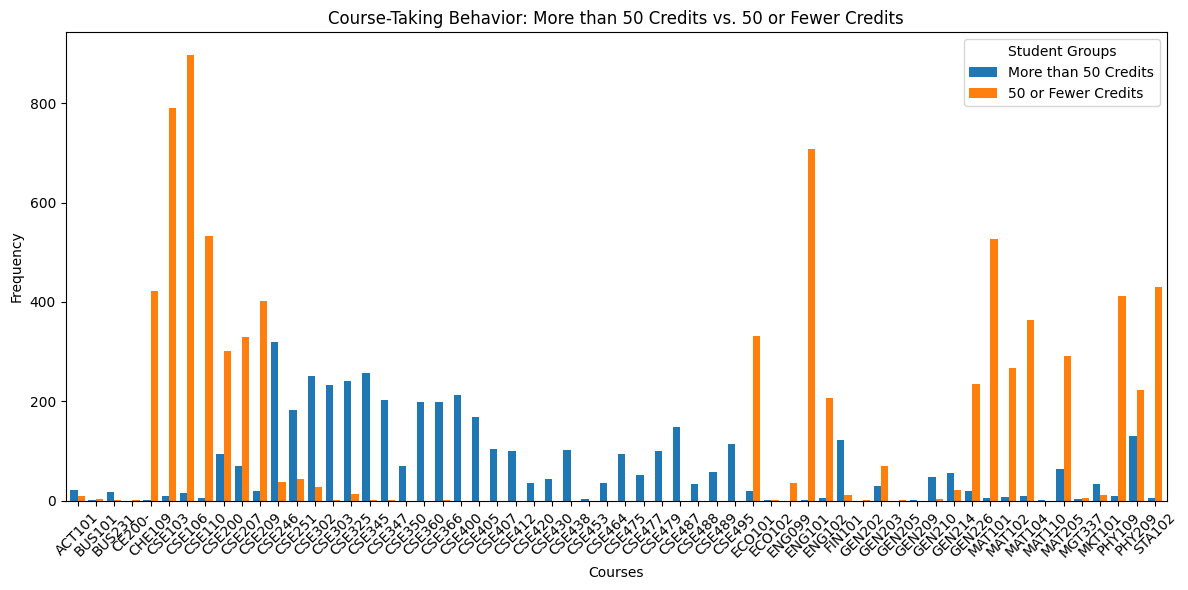

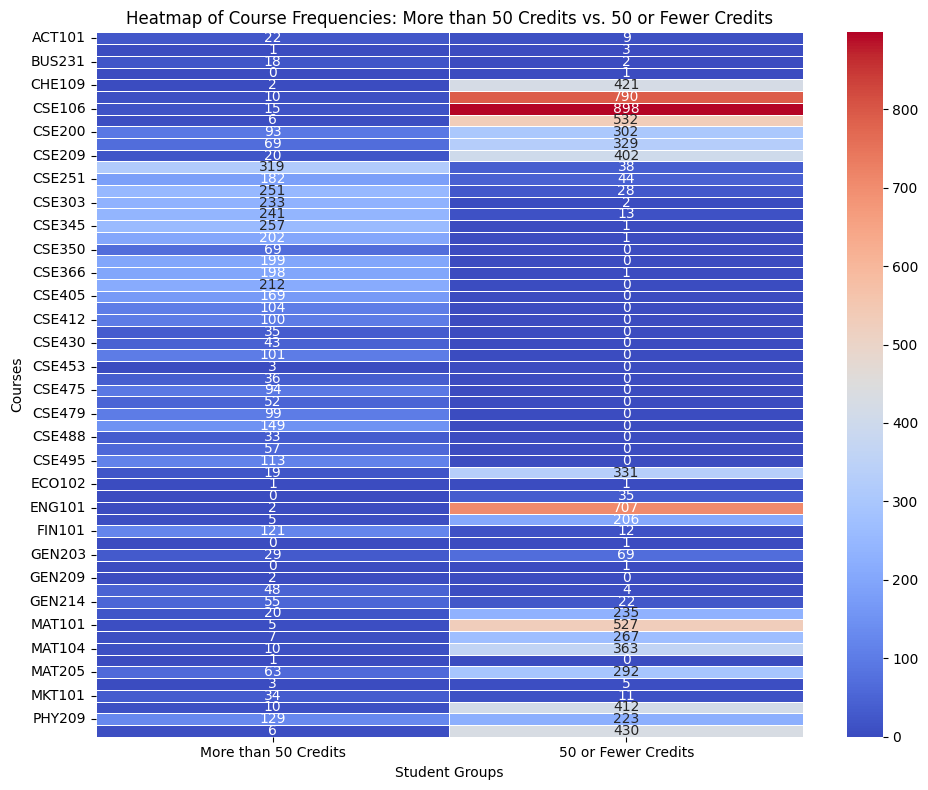

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data
data = pd.read_csv("/content/drive/MyDrive/CSE488_project/csv/csv.csv")  # Replace with your file path

# Step 2: Categorize Students Based on Credits
# Assuming `CreditsCompleted` is the column indicating the number of credits
students_more_than_50 = data[data['CreditsCompleted'] > 50]
students_less_than_equal_50 = data[data['CreditsCompleted'] <= 50]

# Step 3: Compute Course Frequencies for Each Group
def calculate_course_frequencies(df):
    courses = df[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].fillna('None')
    course_counts = courses.apply(pd.Series.value_counts).sum(axis=1).drop('None', errors='ignore')
    return course_counts

frequencies_more_than_50 = calculate_course_frequencies(students_more_than_50)
frequencies_less_than_equal_50 = calculate_course_frequencies(students_less_than_equal_50)

# Step 4: Combine Data for Comparison
comparison_df = pd.DataFrame({
    'More than 50 Credits': frequencies_more_than_50,
    '50 or Fewer Credits': frequencies_less_than_equal_50
}).fillna(0)

# Step 5: Visualization
# Bar Plot for Comparison
comparison_df.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Course-Taking Behavior: More than 50 Credits vs. 50 or Fewer Credits')
plt.xlabel('Courses')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Student Groups')
plt.tight_layout()
plt.show()

# Heatmap for Detailed Comparison
plt.figure(figsize=(10, 8))
sns.heatmap(comparison_df, annot=True, fmt='.0f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Course Frequencies: More than 50 Credits vs. 50 or Fewer Credits')
plt.xlabel('Student Groups')
plt.ylabel('Courses')
plt.tight_layout()
plt.show()


# **Creative and Open-Ended Projects**

# 12. Student Profiles

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



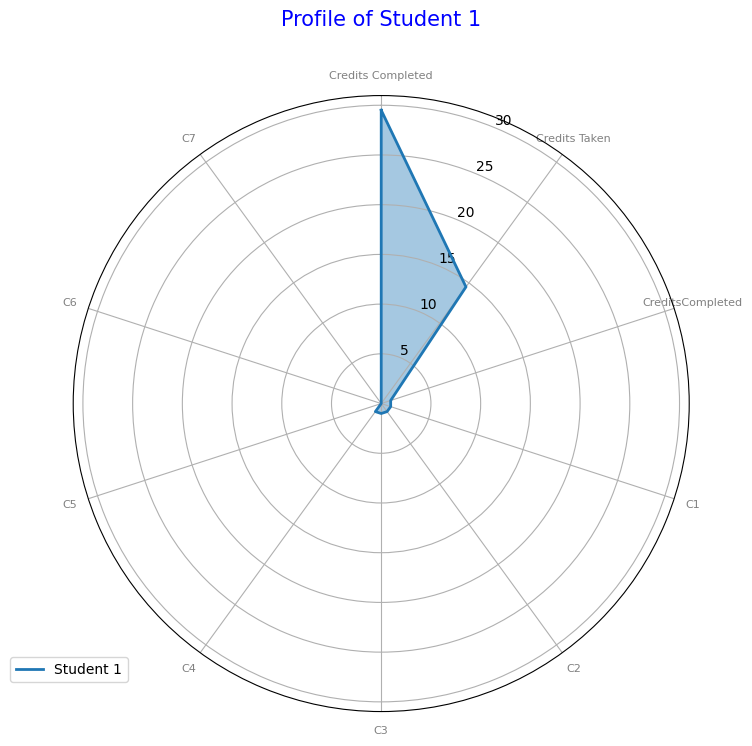

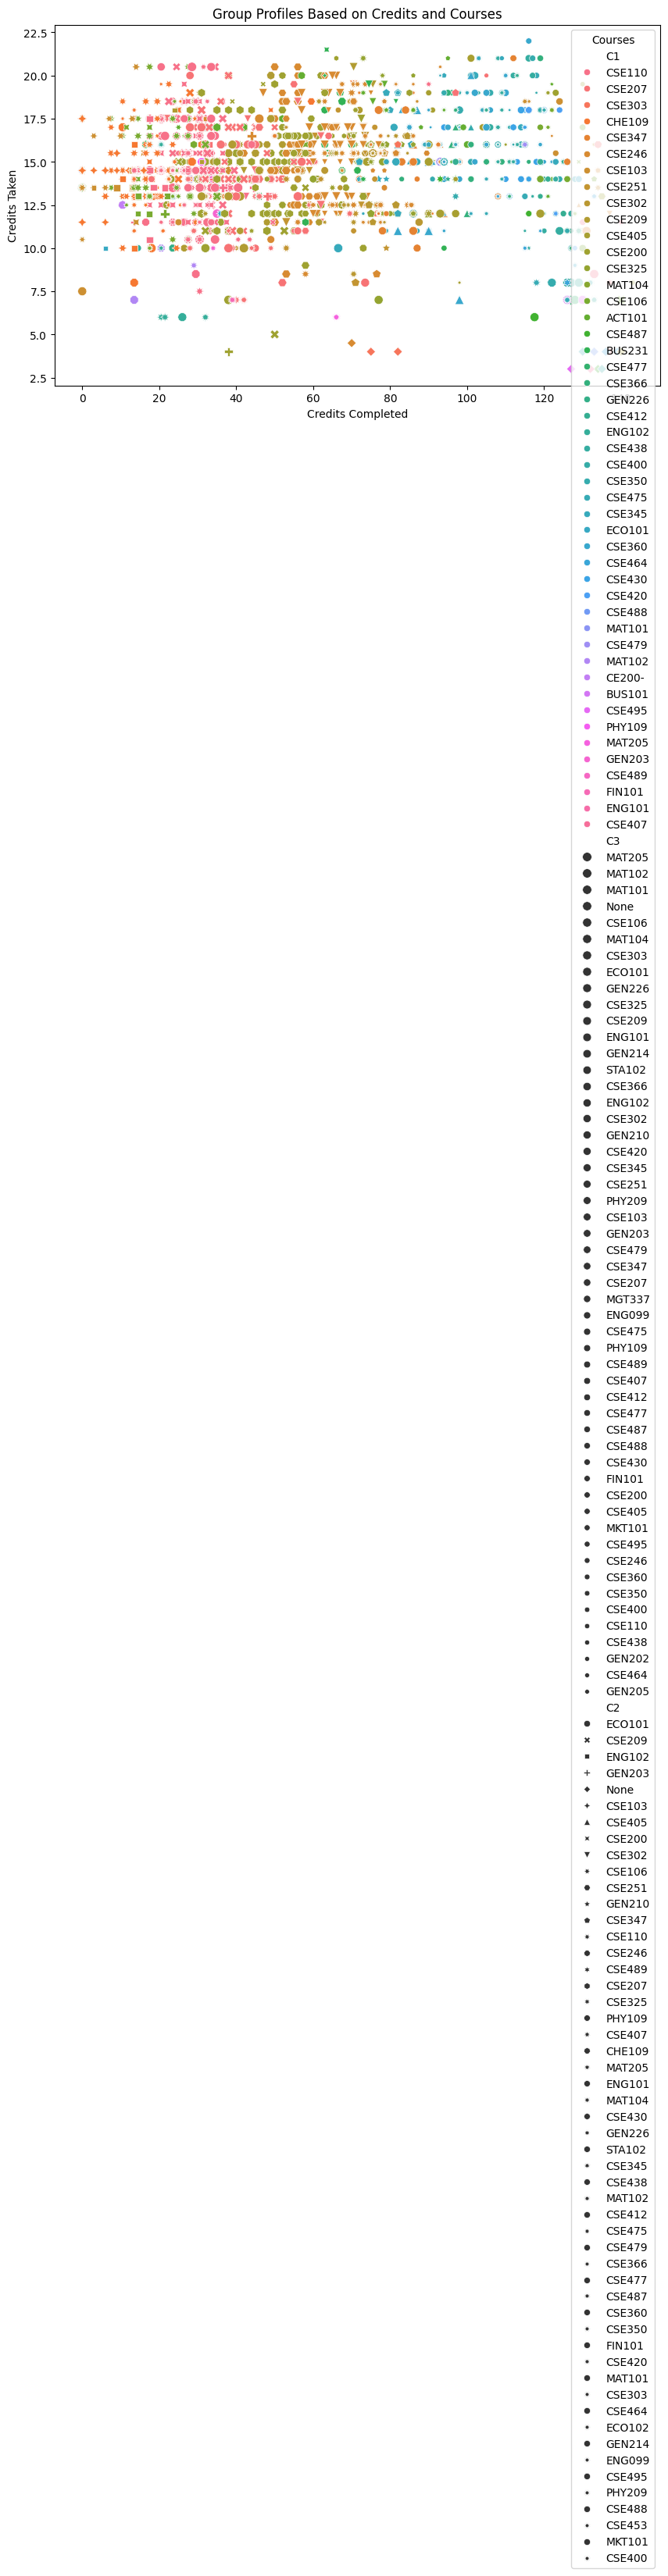

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns

# Step 1: Load Data
data = pd.read_csv("/content/drive/MyDrive/CSE488_project/csv/csv.csv")  # Replace with your file path

# Step 2: Select Relevant Data for Profiles
# Assuming `CreditsCompleted`, `takencredit`, and course columns (C1 to C7) exist in the dataset
profile_data = data[['StudentId', 'CreditsCompleted', 'takencredit', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].fillna('None')

# Step 3: Create a Function to Generate Radar Chart
def create_radar_chart(student_id):
    student = profile_data[profile_data['StudentId'] == student_id].iloc[0]

    # Numerical attributes
    values = [student['CreditsCompleted'], student['takencredit']]
    labels = ['Credits Completed', 'Credits Taken']

    # Add course combinations as binary data (1 if course exists, else 0)
    course_labels = [col for col in profile_data.columns if col.startswith('C')]
    course_values = [1 if student[col] != 'None' else 0 for col in course_labels]

    values.extend(course_values)
    labels.extend(course_labels)

    # Radar Chart
    num_vars = len(values)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]  # Complete the circle

    values += values[:1]  # Complete the circle for the chart

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], labels, color='grey', size=8)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Student {student_id}')
    ax.fill(angles, values, alpha=0.4)
    plt.title(f"Profile of Student {student_id}", size=15, color='blue', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

# Step 4: Generate Scatter Plot for Group Profiles
def group_profiles():
    # Group Profiles
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=profile_data, x='CreditsCompleted', y='takencredit', hue='C1', style='C2', size='C3')
    plt.title("Group Profiles Based on Credits and Courses")
    plt.xlabel("Credits Completed")
    plt.ylabel("Credits Taken")
    plt.legend(title='Courses')
    plt.show()

# Step 5: Generate Individual Profiles and Group Profile
# Replace with a valid StudentID from your dataset to view their profile
example_student_id = profile_data['StudentId'].iloc[0]  # Replace with a valid ID
create_radar_chart(example_student_id)

# Generate Group Profiles
group_profiles()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Profile for Student 1:
Credits Completed: 29.5
Credits Taken: 14.5
Courses Taken:
- CSE110
- ECO101
- MAT205
- PHY109


<ipython-input-7-c8f38f83bd39>:31: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



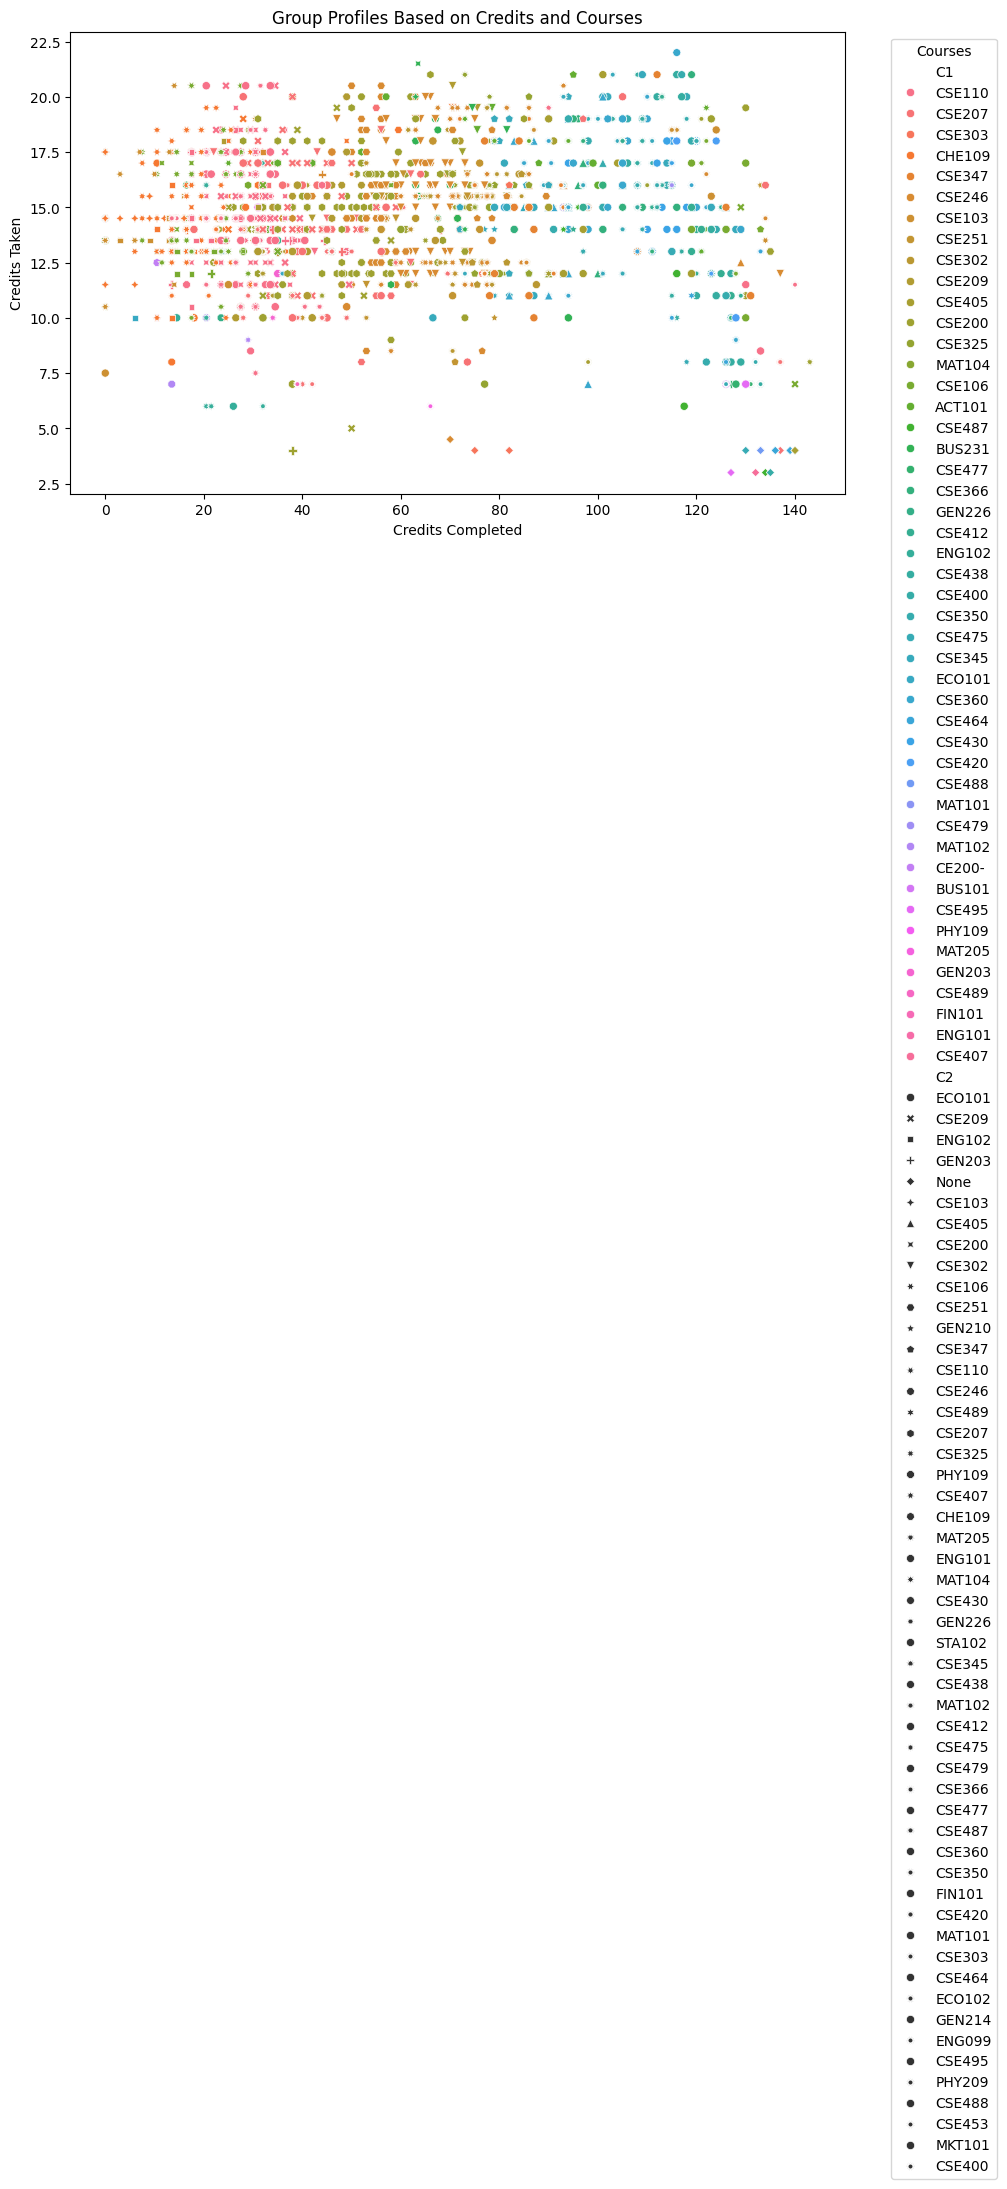

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data
data = pd.read_csv("/content/drive/MyDrive/CSE488_project/csv/csv.csv")  # Replace with your file path

# Step 2: Select Relevant Data
# Assuming `CreditsCompleted`, `takencredit`, and course columns (C1 to C7) exist
profile_data = data[['StudentId', 'CreditsCompleted', 'takencredit', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].fillna('None')

# Step 3: Generate a Simplified Profile for a Student
def create_student_profile(student_id):
    student = profile_data[profile_data['StudentId'] == student_id].iloc[0]
    print(f"Profile for Student {student_id}:")
    print(f"Credits Completed: {student['CreditsCompleted']}")
    print(f"Credits Taken: {student['takencredit']}")
    print("Courses Taken:")
    for course in ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']:
        if student[course] != 'None':
            print(f"- {student[course]}")

# Step 4: Generate a Scatter Plot for Group Profiles
def create_group_profiles():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=profile_data, x='CreditsCompleted', y='takencredit', hue='C1', style='C2')
    plt.title("Group Profiles Based on Credits and Courses")
    plt.xlabel("Credits Completed")
    plt.ylabel("Credits Taken")
    plt.legend(title="Courses", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Step 5: Use the Simplified Functions
# Replace with a valid StudentId from your dataset to view their profile
example_student_id = profile_data['StudentId'].iloc[0]  # Replace with a valid ID
create_student_profile(example_student_id)

# Create a group profile plot
create_group_profiles()


# 13. Custom Dashboards